# **Assignment 2: ThreeSum Brute Force Algorithm Performance Analysis**

## **Part 1 - Three Sum Brute Force Implementation:**

In [2]:
def threeSum(arr, target):
  n = len(arr)
  cnt = 0

  # Edge cases to ensure inputs are valid.
  if not isinstance(arr, list):
    raise TypeError("Arr must be of type list.")
  if not isinstance(target, int):
    raise TypeError("Target must be of type int.")
  if n < 3:
    raise ValueError("Array length must be greater than 2.")

  # Loop through to n-2 because from that index, n-1 and n will be checked
  for i in range(n-2):
    # Check to see if next 2 indices are distinct
    if arr[i] == arr[i+1] or arr[i] == arr[i+2] or arr[i+1] == arr[i+2]:
      raise ValueError("The array has indistinct integers")
    else:
      # Loop through i+1 to n-1 to compare each index after i
      for j in range(i+1, n-1):
        # Loop through j+1 to n to compare each index after j
        # These three nested loops ensure that every combination of three indices is checked to see if they add up to the target value
        for k in range(j+1, n):
          # Base operation with a cnt variable to count the number of comparisons/base operations
          cnt += 1
          if arr[i] + arr[j] + arr[k] == target:
            return (i, j, k), cnt
  # Return None if no three indices add up to target variable
  return None, cnt


### *Test Cases -*

In [14]:
# Positive integers, indices exist, expected output: (0, 3, 4) 10
arr = [3, 7, 1, 2, 8, 4, 5]
target = 13
indices, count = threeSum(arr, target)

print(indices, count)



(0, 3, 4) 10


In [15]:
# Positive/negative integers, indices exist, expected output: (0, 1, 2) 1
arr = [-1, 7, 1, 2, 8, 4, 5]
target = 7
indices, count = threeSum(arr, target)

print(indices, count)

(0, 1, 2) 1


In [18]:
# Positive integers, no indices exist for given target, expected output: (None) 35
arr = [3, 7, 1, 2, 8, 4, 5]
target = 1
indices, count = threeSum(arr, target)

print(indices, count)

None 35


In [19]:
# Positive integers with minimum array size, indices exist, expected output: (0, 1, 2) 1
arr = [1, 2, 3]
target = 6
indices, count = threeSum(arr, target)

print(indices, count)

(0, 1, 2) 1


In [20]:
# Invalid target type, expected output: TypeError("Target must be of type int.")
arr = [1, 2, 3]
target = "6"
indices, count = threeSum(arr, target)

print(indices, count)

TypeError: Target must be of type int.

#### *Starter containing citations, imports, array generation, and time algorithm:*

In [3]:
import time
import matplotlib.pyplot as plt
import numpy as np
import random

# Citations:
# https://stackoverflow.com/questions/4990718/how-can-i-write-a-try-except-block-that-catches-all-exceptions
# https://www.w3schools.com/python/python_try_except.asp
# https://docs.python.org/3/library/exceptions.html#IndexError
# https://www.geeksforgeeks.org/python/difference-between-list-and-array-in-python/
# https://www.youtube.com/watch?v=IDvFxCyMutk
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
# https://www.youtube.com/watch?v=cRBSOz49fQk
# https://www.youtube.com/watch?v=jzZsG8n2R9A
# https://saturncloud.io/blog/how-to-check-if-a-variable-is-either-a-python-list-numpy-array-or-pandas-series/#:~:text=or%20Pandas%20Series-,To%20check%20if%20a%20variable%20is%20either%20a%20python%20list,check%20against%20all%20three%20types.

# Kept random seed for testing
random.seed(42)

def time_algorithm(algo, arr, target):
    start = time.time()
    algo(arr.copy(), target)
    return time.time() - start

## **Part 2 - Complexity Analysis:**

### *Time Complexity Derivation -*

#### When looking at the triple nested for loop, we can observe that i goes from 0 to n-3, j goes from i+1 to n-2, and k goes from j+1 to n-1. We can write the total number of comparisons as C(n, 3). By definition, this can be written as n!/(3!(n-3)!). We expand n! until we reach (n-3)! so that we can cancel out the denominator leaving us with (n*(n-1)*(n-2))/3!. Simplifying this further, we reach (1/6)n^3-(3/6)n^2+(2/6)n. After dropping all lower order terms and constants we are left with n^3 meaning O(n^3)

### *Space Complexity Analysis -*

#### When looking at space complexity, we can observe the varirables, n, cnt, i, j, k. Because there is no extra data structure that would change with a different array, the space complexity is constant at O(1).

### *Best, Average, and Worst Case Analysis -*

#### Best case refers to Big-Omega. Best case would be best in scenarios where you know you have a pre-sorted array and your algorithm can fly through just ensuring it is sorted. Average case, or Big-Theta, makes most sense when averaging the performance of an algorithm where the contents that need to be sorted are randomly mixed. Worst case is ideal in scenarios where you want to know the absolute worst runtime that can happen, such as in industrial settings. For our specific purposes, we focus on worst case because of how quickly the runtime of the brute force version of threeSum grows. As a O(n^3) algorithm in the worst case it is incredibly slow as you give it a larger array in the worst case.

## **Part 3 - Empirical Analysis:**

### *Test Data Generation -*
#### ******Document Data gen Approach*******

In [4]:
# Generating random arrays and test data with a solution
size = [50, 100, 200, 400, 800]
target = 27
means_threesum = []
means_ops = []

for n in size:
  runtimes_threesum = []
  ops_cnt = []
  for i in range(10):
    arr = list(range(1, n + 1))
    random.shuffle(arr)
    runtimes_threesum.append(time_algorithm(threeSum, arr, target))
    ops_cnt.append(threeSum(arr, target)[1])
  means_threesum.append(np.mean(runtimes_threesum))
  means_ops.append(np.mean(ops_cnt))

# Generating random arrays and test data with no solution
nosol_target = 0
nosol_means_threesum = []
nosol_means_ops = []

for n in size:
  nosol_runtimes_threesum = []
  nosol_ops_cnt = []
  for i in range(10):
    nosol_arr = list(range(1, n + 1))
    random.shuffle(nosol_arr)
    nosol_runtimes_threesum.append(time_algorithm(threeSum, nosol_arr, nosol_target))
    nosol_ops_cnt.append(threeSum(nosol_arr, nosol_target)[1])
  nosol_means_threesum.append(np.mean(nosol_runtimes_threesum))
  nosol_means_ops.append(np.mean(nosol_ops_cnt))


### *Runtime Measurements -*

#### Table showcasing arrays average runtime and operation count with a solution

In [5]:
# With Solutions
print(f"Array Size | Avg. Runtime | Operations Count:\n")
for k in range(5):
  print(f"{size[k]}, {means_threesum[k]}, {means_ops[k]}")

Array Size | Avg. Runtime | Operations Count:

50, 0.0002249002456665039, 1555.8
100, 0.0013938188552856446, 14499.3
200, 0.008913540840148925, 98209.6
400, 0.11176629066467285, 970503.2
800, 1.1308520793914796, 7792937.8


#### Table showcasing arrays average runtime and operation count with **no** solution

In [6]:
# With No Solutions
print(f"Array Size | Avg. Runtime | Operations Count:\n")
for k in range(5):
  print(f"{size[k]}, {nosol_means_threesum[k]}, {nosol_means_ops[k]}")

Array Size | Avg. Runtime | Operations Count:

50, 0.00163576602935791, 19600.0
100, 0.013875794410705567, 161700.0
200, 0.12109346389770508, 1313400.0
400, 1.3938122987747192, 10586800.0
800, 11.786972308158875, 85013600.0


### Visualization and Analysis -

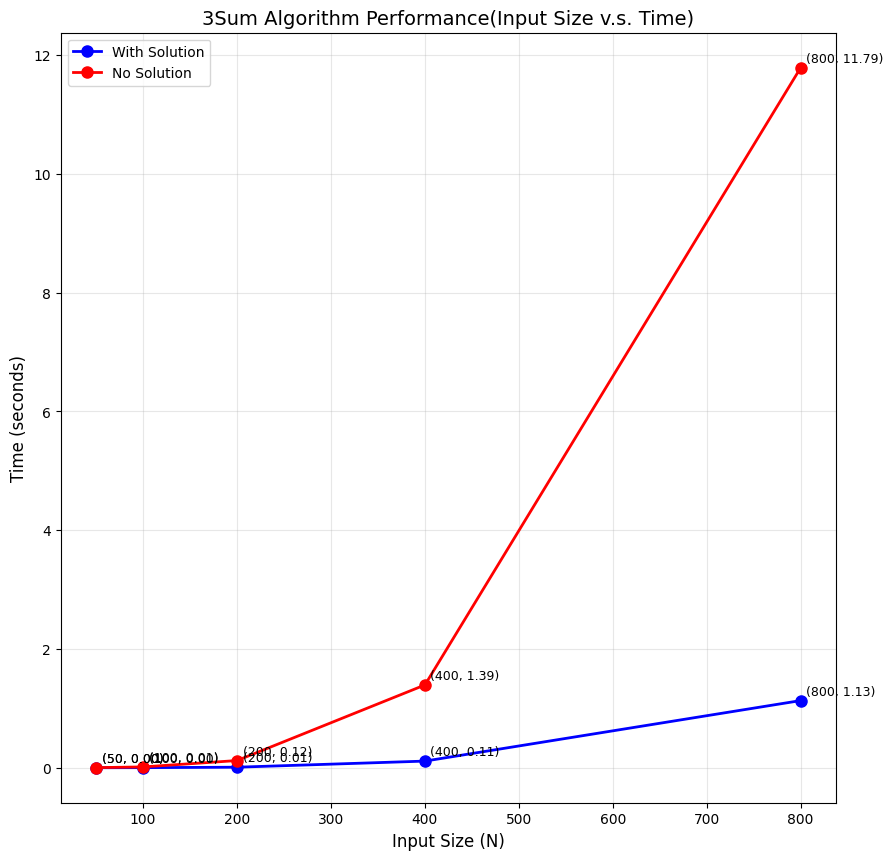

In [7]:
fig, ax1 = plt.subplots(figsize=(10, 10))

# Standard scale plot
ax1.plot(size, means_threesum, 'bo-', linewidth=2, markersize=8, label='With Solution')
ax1.plot(size, nosol_means_threesum, 'ro-', linewidth=2, markersize=8, label='No Solution')
ax1.set_xlabel('Input Size (N)', fontsize=12)
ax1.set_ylabel('Time (seconds)', fontsize=12)
ax1.set_title('3Sum Algorithm Performance(Input Size v.s. Time)', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add annotations
for i, (x, y) in enumerate(zip(size, means_threesum)):
    ax1.annotate(f'({x}, {y:.2f})',
                xy=(x, y),
                xytext=(4, 4),
                textcoords='offset points',
                fontsize=9)
for i, (x, y) in enumerate(zip(size, nosol_means_threesum)):
    ax1.annotate(f'({x}, {y:.2f})',
                xy=(x, y),
                xytext=(4, 4),
                textcoords='offset points',
                fontsize=9)

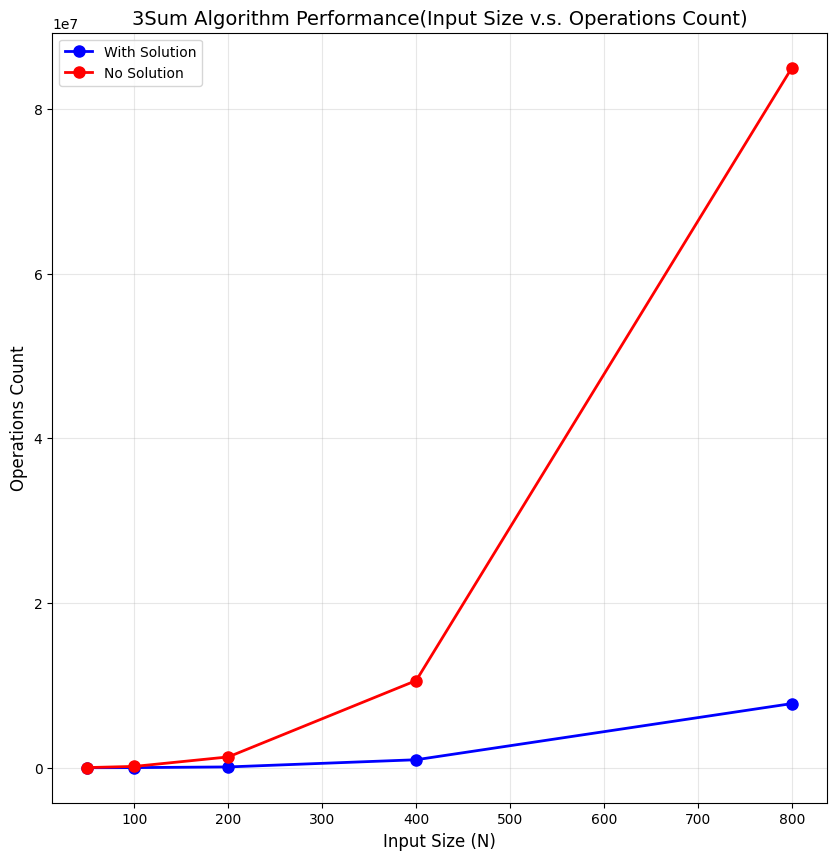

In [8]:
fig, ax1 = plt.subplots(figsize=(10, 10))

# Standard scale plot
ax1.plot(size, means_ops, 'bo-', linewidth=2, markersize=8, label='With Solution')
ax1.plot(size, nosol_means_ops, 'ro-', linewidth=2, markersize=8, label='No Solution')
ax1.set_xlabel('Input Size (N)', fontsize=12)
ax1.set_ylabel('Operations Count', fontsize=12)
ax1.set_title('3Sum Algorithm Performance(Input Size v.s. Operations Count)', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

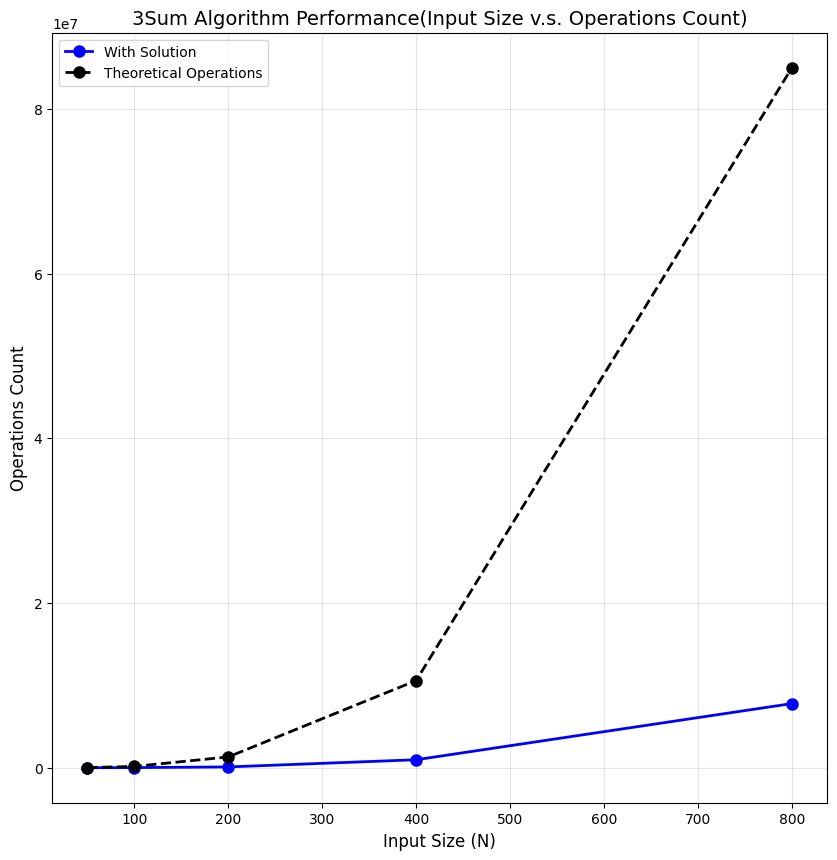

In [9]:
ops_theoretical = [n*(n-1)*(n-2)//6 for n in size]
fig, ax1 = plt.subplots(figsize=(10, 10))

# Standard scale plot
ax1.plot(size, means_ops, 'bo-', linewidth=2, markersize=8, label='With Solution')
ax1.plot(size, ops_theoretical, 'ko--', linewidth=2, markersize=8, label='Theoretical Operations')
ax1.set_xlabel('Input Size (N)', fontsize=12)
ax1.set_ylabel('Operations Count', fontsize=12)
ax1.set_title('3Sum Algorithm Performance(Input Size v.s. Operations Count)', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

In [10]:
import math

# Calculate slope using two points from no solution table above.
N1, T1 = 400, 1.3875
N2, T2 = 800, 12.1455

b = (math.log10(T2) - math.log10(T1)) / (math.log10(N2) - math.log10(N1))
print(f"Calculated slope b = {b:.4f}")

# Alternative: Using natural logarithm
b_ln = (math.log(T2) - math.log(T1)) / (math.log(N2) - math.log(N1))
print(f"Slope using ln: b = {b_ln:.4f}")

Calculated slope b = 3.1299
Slope using ln: b = 3.1299


In [14]:
# Use linear regression for more accurate slope
log_N = np.log10(size)
log_T = np.log10(nosol_means_threesum)

# Perform linear regression
slope, intercept = np.polyfit(log_N, log_T, 1)
print(f"Linear regression slope: {slope:.4f}")
print(f"Linear regression intercept: {intercept:.4f}")

# Calculate the scaling constant a
a = 10**intercept
print(f"Scaling constant a = {a:.9f}")

Linear regression slope: 3.2280
Linear regression intercept: -8.2968
Scaling constant a = 0.000000005


In [36]:
# Generate projections
print(f"{'Array Size(N)->50-100, 100-200, 200-400, 400-800'}")
print(f"{'Expected Runtime Ratio|'}{'Measured Ratio'}")
print("-" * 55)
for i in range(n-1):
  print(f"{'8.0x(2^3) '}{means_threesum[i+1]/means_threesum[i]}")


Array Size(N)->50-100, 100-200, 200-400, 400-800
Expected Runtime Ratio|Measured Ratio
-------------------------------------------------------
8.0x(2^3) 6.197498144810772
8.0x(2^3) 6.395049691247156
8.0x(2^3) 12.538932918919064
8.0x(2^3) 10.118006714424494


## **Part 4 - Comparative Analysis:**

### *Sorted Array + Two Pointers -*
#### The general idea of this approach is to take the input array and sort it. You can then fix one value of the array and set a pointer at the beginning and end of the array that is left over after fixing the value. You will then take the pair of pointers, plus the fixed value and check to see if the triple adds to the target. If the sum is smaller than the target, the left pointer is moved to the right. If the sum is too large, the right pointer is moved to the left.This process will repeat until all triplets have been checked and ensures we find all valid triplets that add up to the target. This implementation is O(n^2) rather than O(n^3) because for each element in the array, you pick a fixed value resulting in O(n) and for each fixed value, you use the pointers to iterate over the rest of the array in O(n) resulting in O(n^2). Using the simplified combination notation constants and lower order terms down, the number of operations for a n of 1000 for the brute force method would be (1000^3)/6 = 166666667 operations. For the sorted array + two pointer approach, 1000^2 = 1000000 operations

### *Hash Table Approach -*
#### The general idea of the hash table approach is to create a hash table that stores the values of each value in the array it has passed over. You fix a value and calculate the complement of every other value in the array. If the complement is in the hash table, a triplet has been found. Otherwise, add the value of the current index into the hash table. This repeats until all triplets are found. The time complexity for this algorithm would be O(n^2) because for every element in the array, you iterate over the rest of the elements in the array. The space complexity would be O(n) because of the hash map that stores the values that have been passed over already. When looking at the trade offs between space and time, we end up with a much faster algorithm however the memory used by the algorithm increases directly with the input size.

## **Part 5 - Reflection and Conclusions:**

### *Report -*
#### When observing the brute force apporach to the three sum problem, we have observed that the time complexity is cubic at O(n^3). With the nature of the cubic time complexity as well as the need to check all combinations, the algorithm slows down incredibly in the worst case scenarios as the input size grows. When I was testing the test cases with no solution this could be seen instantly that the runtime was taking much longer. When looking at my graphs and tables, from what I can tell the initial most noteable jump in runtime was from an n of 200 to 400. The average runtime jumped from 0.121s at an n of 200 to 1.394s at an of 400. Looking at my table with my measured ratios, my ratios weren't exactly at 8 but followed roughly around that pattern. When looking at my graphs, I could see that my no solution test case matched my theoretical O(n^3) graph pefectly. Comparing my no solution runtimes to my solution runtimes, the with solution was much lower which I attribute to the aglo finding the solution early on. The factors that would have influenced deviations from the theoretical predictions I believe could possibly be from system hardware, or possibly from using google colab. I do also wonder how larger n sizes would affect the results of the ratios for example letting the algorithm run with larger n sizes possibly having more stable results. I believe it is important to consider algorithm complexity before implementation due to the numerous amounts of small nuances where the algorithm could go wrong if you don't fully understand what you are implementing. For example, now, with the brute force solution to three sum, if you don't use test cases with larger sizes of n and just examined that the algorithm was fast with a smaller array you would entirely miss the problems that the algorithm has at scale. I think another reason it is important to consider the complexity before implementation is because it allows us to understand the different trade offs that can be made between space and time complexity.